# Séries temporais de dados financeiros

Bibliotecas utilizadas

In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon
import numpy as np 
import pandas as pd

In [2]:
plt.style.use('bmh')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '12'
plt.rcParams['axes.grid'] = False

Carregamento dos dados

In [7]:
filename = '../data/tr_eikon_eod_data.csv'
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [8]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [11]:
instruments = [
    'Apple Stock', 'Microsoft Stock',
    'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
    'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
    'VIX Volatility Index', 'EUR/USD Exchange Rate',
    'Gold Price', 'VanEck Vectors Gold Miners ETF',
    'SPDR Gold Trust'
]

for ric, name in zip(data.columns, instruments):
    print(f'{ric:8s} | {name}')

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


## Resumos estatísticos

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [10]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


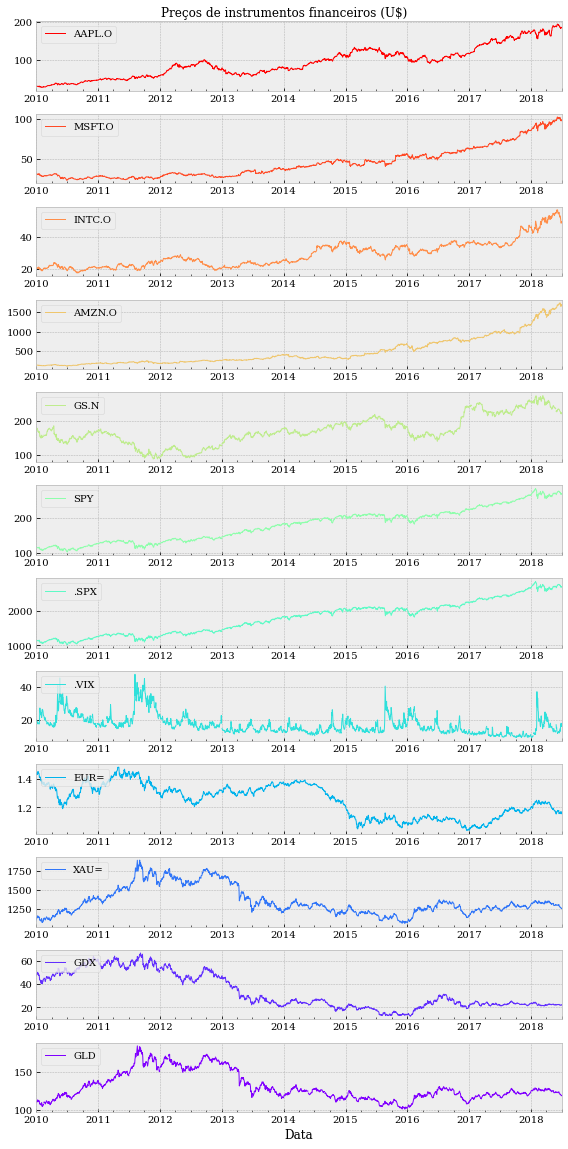

In [51]:
n = len(data.columns)
cmap=plt.cm.get_cmap(plt.cm.rainbow_r, 143)
fig, ax = plt.subplots(n, 1, figsize=(8, 16))
plt.suptitle('Preços de instrumentos financeiros (U$)')
for ric, i in zip(data.columns, range(n)):
    data[ric].plot(ax = ax[i], label=ric, lw=1, c=cmap(2*n*i))
    ax[i].legend(loc=2)
    ax[i].grid(True)
    ax[i].set_xlabel(None)
plt.tight_layout()
plt.xlabel('Data')
plt.show()

## Diferenças ao decorrer do tempo

In [55]:
data.diff().head().mean()

AAPL.O   -0.163333
MSFT.O   -0.166000
INTC.O   -0.093333
AMZN.O   -1.300000
GS.N      1.530000
SPY       0.286667
.SPX      2.900000
.VIX     -0.326667
EUR=     -0.000125
XAU=      8.887500
GDX       0.463333
GLD       0.340000
dtype: float64

In [87]:
avg_diff = data.diff().head().mean().to_frame()

avg_diff

,0
AAPL.O,-0.163333
MSFT.O,-0.166000
INTC.O,-0.093333
AMZN.O,-1.300000
GS.N,1.530000
SPY,0.286667
.SPX,2.900000
.VIX,-0.326667
EUR=,-0.000125
XAU=,8.887500


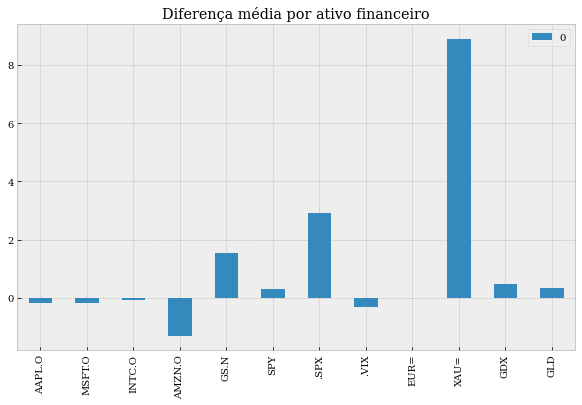

In [90]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_axisbelow(True)
avg_diff.plot(kind='bar', ax=ax)
ax.set_title('Diferença média por ativo financeiro')
plt.grid(True)
plt.show()